In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-clean.csv')

In [3]:
df.shape

(19980, 16)

In [4]:
df.head()

,selling_price,year,km_driven,transmission_type,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol
0,1.20,2012.0,120000,1,19.70,796.0,46.30,5.0,0,1,0,0,0,0,0,1
1,5.50,2016.0,20000,1,18.90,1197.0,82.00,5.0,0,1,0,0,0,0,0,1
2,2.15,2010.0,60000,1,17.00,1197.0,80.00,5.0,0,1,0,0,0,0,0,1
3,2.26,2012.0,37000,1,20.92,998.0,67.10,5.0,0,1,0,0,0,0,0,1
4,5.70,2015.0,30000,1,22.77,1498.0,98.59,5.0,1,0,0,0,1,0,0,0


In [5]:
df.isna().sum()

selling_price                   0
year                            0
km_driven                       0
transmission_type               0
mileage                         0
engine                          0
max_power                       0
seats                           0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
fuel_type_CNG                   0
fuel_type_Diesel                0
fuel_type_Electric              0
fuel_type_LPG                   0
fuel_type_Petrol                0
dtype: int64

In [60]:
X = df.drop(columns=['selling_price']).values
Y = df['selling_price'].values

In [61]:
X.shape

(19980, 15)

In [62]:
Y = Y.reshape(-1, 1)

In [63]:
Y.shape

(19980, 1)

# Standardise the Data

In [64]:
mu = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [65]:
X = (X-mu)/std

In [66]:
X[:5, :4]

array([[-0.77717587,  1.19394023,  0.49647833,  0.07636062],
       [ 0.45393282, -0.73940588,  0.49647833, -0.09680191],
       [-1.39273021,  0.03393256,  0.49647833, -0.50806291],
       [-0.77717587, -0.41073704,  0.49647833,  0.34043348],
       [ 0.14615565, -0.54607127,  0.49647833,  0.74087183]])

In [68]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(19980, 16)


In [69]:
X[:5, :4]

array([[ 1.        , -0.77717587,  1.19394023,  0.49647833],
       [ 1.        ,  0.45393282, -0.73940588,  0.49647833],
       [ 1.        , -1.39273021,  0.03393256,  0.49647833],
       [ 1.        , -0.77717587, -0.41073704,  0.49647833],
       [ 1.        ,  0.14615565, -0.54607127,  0.49647833]])

# Scratch Implementation


- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised

In [70]:
def hypothesis(X,theta):
    '''
    X : np.array. shape - (m,n)
    theta : np.array. shape - (n,1)
    
    return : np.array (m,1)
    '''

    return X.dot(theta)

def error(X,Y,theta):
    '''
    X : np.array. shape - (m,n)
    Y : np.array. shape - (m,1)
    theta : np.array. shape - (n,1)
    
    return : Scalar loss value
    '''
    
    Y_ = hypothesis(X,theta)
    e = np.sum((Y-Y_)**2)
    
    return e/(2*X.shape[0])
    
def gradient(X,Y,theta):
    '''
    X : np.array. shape - (m,n)
    Y : np.array. shape - (m,1)
    theta : np.array. shape - (n,1)
    
    return : np.array (n,1)
    '''
    
    Y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(Y_ - Y))
    
    return grad/X.shape[0]

def gradient_descent(X, Y, learning_rate = 0.1, max_iters=100):
    
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,Y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [71]:
theta, error_list = gradient_descent(X,Y)

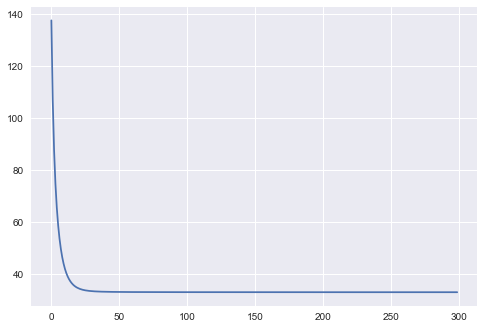

In [72]:
plt.plot(error_list)
plt.show()

### Predictions

In [75]:
Y_ = hypothesis(X, theta)

In [92]:
Y[:5]

array([[1.2 ],
       [5.5 ],
       [2.15],
       [2.26],
       [5.7 ]])

In [93]:
Y_[:5]

array([[-2.73823768],
       [ 5.62898873],
       [ 1.55901388],
       [ 0.82280178],
       [ 8.10577778]])

# Evaluation Metric (R2 score)

In [97]:
def r2_score(Y, Y_):
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom) 
    return score

In [98]:
r2_score(Y, Y_)

0.6003910325522224